# Technical Task 5
## by FELIX IVANDER GANUMBA

In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
cancer_data = datasets.load_breast_cancer()
cancer_data;

In [3]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
df = pd.DataFrame(data=cancer_data['data'], columns=cancer_data['feature_names'])
df['target']=pd.Series(data=cancer_data['target'],index=df.index)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
#Splitting training data and test data
from sklearn.model_selection import train_test_split
X= df.drop(['target'], axis=1)
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=15, test_size=0.2)

## Using Cancer dataset from sklearn library, do this following task:
### 1. k-Means Clustering towards the dataset
### 2. k-Means Clustering for n Principal Components
### 3. Evaluate the quality of both clusters by using Adjusted Rand Index (ARI).

Please also mention/show your time computation (hint: use %%timeit in the top of the cell)

## K-Means Clustering towards the dataset

In [6]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [7]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#standardize the data
from sklearn import preprocessing
#StandardScaler
scaler = preprocessing.StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard= scaler.fit_transform(X_test)

#Normal Scale
# X_standard = preprocessing.scale(X, axis=1)

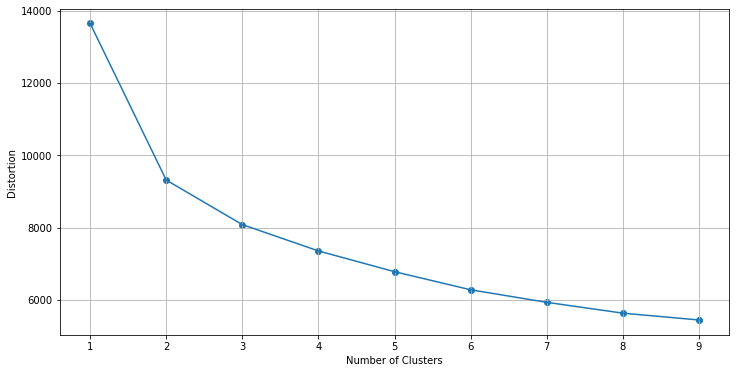

In [9]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X_train_standard)
    distortions.append(kmeans_model.inertia_)
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(K, distortions)
plt.scatter(K, distortions)
plt.ylabel('Distortion')
plt.xlabel('Number of Clusters')
plt.grid()
plt.show()

we will use clusters=2

In [10]:
%%time
from sklearn.metrics import adjusted_rand_score
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X_train_standard)
predicted_y_test = kmeans_model.predict(X_test_standard)

Wall time: 49 ms


In [11]:
y_test

350    1
222    1
141    0
447    1
103    1
      ..
250    0
465    1
11     0
261    0
71     1
Name: target, Length: 114, dtype: int32

In [12]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
350,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,...,13.280,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
222,10.180,17.53,65.12,313.1,0.10610,0.08502,0.017680,0.01915,0.1910,0.06908,...,11.170,22.84,71.94,375.6,0.14060,0.14400,0.06572,0.05575,0.3055,0.08797
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.05943,0.1861,0.06248,...,19.920,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
447,14.800,17.66,95.88,674.8,0.09179,0.08890,0.040690,0.02260,0.1893,0.05886,...,16.430,22.74,105.90,829.5,0.12260,0.18810,0.20600,0.08308,0.3600,0.07285
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.03029,0.1945,0.06322,...,10.760,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,20.940,23.56,138.90,1364.0,0.10070,0.16060,0.271200,0.13100,0.2205,0.05898,...,25.580,27.00,165.30,2010.0,0.12110,0.31720,0.69910,0.21050,0.3126,0.07849
465,13.240,20.13,86.87,542.9,0.08284,0.12230,0.101000,0.02833,0.1601,0.06432,...,15.440,25.50,115.00,733.5,0.12010,0.56460,0.65560,0.13570,0.2845,0.12490
11,15.780,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.06606,0.1842,0.06082,...,20.420,27.28,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480
261,17.350,23.06,111.00,933.1,0.08662,0.06290,0.028910,0.02837,0.1564,0.05307,...,19.850,31.47,128.20,1218.0,0.12400,0.14860,0.12110,0.08235,0.2452,0.06515


## PCA (PRINCIPAL COMPONENT ANALYSIS)

In [13]:
#preprocessing the whole data
import numpy as np
scaled_df = scaler.fit_transform(X)
np.mean(scaled_df),np.std(scaled_df)

(-6.118909323768877e-16, 1.0)

In [14]:
scaled_df.shape

(569, 30)

In [15]:
feat_cols = ['PC_'+str(i) for i in range(scaled_df.shape[1])]
scaled_df = pd.DataFrame(scaled_df,columns=feat_cols)
scaled_df

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(data=x_pca, columns=["PC_1", "PC_2"])
df_pca

,PC_1,PC_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [17]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

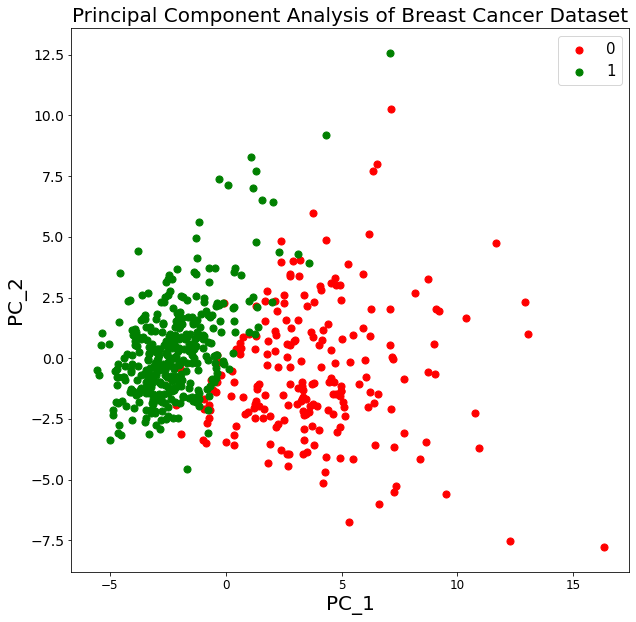

In [18]:
#visualize the result of PCA

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC_1',fontsize=20)
plt.ylabel('PC_2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    plt.scatter(df_pca.loc[indicesToKeep, 'PC_1']
               ,df_pca.loc[indicesToKeep, 'PC_2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### K-Means Clustering 2 Principal Components

In [19]:
distortions_pca = []
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(df_pca,y, test_size=0.2, random_state=15)
print(X_pca_train.shape, X_pca_test.shape)
print(y_pca_train.shape, y_pca_test.shape)

(455, 2) (114, 2)
(455,) (114,)


In [20]:
%%time
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X_pca_train)
predicted_y_pca = kmeans_model.predict(X_pca_test)

Wall time: 48 ms


AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

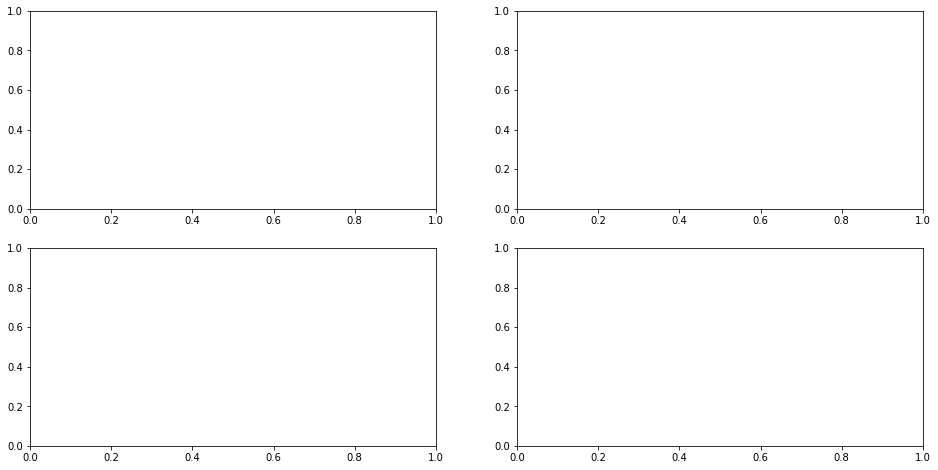

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
targets = [0, 1]
colors = ['r', 'g']
labels=['Benign','Malignant']

axes[0].set_xlabel('PC_1',fontsize=20)
axes[0].set_ylabel('PC_2',fontsize=20)
axes[0].set_title("Actual Clustering Plot",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = y_pca_test == target
    axes[0].scatter(X_pca_test.loc[indicesToKeep, 'PC_1']
               ,X_pca_test.loc[indicesToKeep, 'PC_2'], c = color, s = 50)

axes[0].legend(labels,prop={'size': 10})

axes[1].set_xlabel('PC_1',fontsize=20)
axes[1].set_ylabel('PC_2',fontsize=20)
axes[1].set_title("Prediction",fontsize=20)
axes[1].set_title("K-Means Clustering Plot",fontsize=20)
for target, color in zip(targets,colors):
    indicesToKeep = predicted_y_pca == target
    axes[1].scatter(X_pca_test.loc[indicesToKeep, 'PC_1']
               ,X_pca_test.loc[indicesToKeep, 'PC_2'], c = color, s = 50)

axes[1].legend(labels,prop={'size': 10})


fig.tight_layout()
plt.show()

## Evaluate Both Clusters by ARI (Adjusted Rand Index)

ARI of K-Means Clustering towards the standardized dataset:

In [22]:
adjusted_rand_score(y_test, predicted_y_test)

0.5583963461110142

ARI of K-Means Clustering for 2 Principal Components:

In [23]:
adjusted_rand_score(y_pca_test, predicted_y_pca)

0.5852506648984104